## MCO distribution trend, time dependence of the height of each single bin with and without dominant individuals. 

In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats

### Decay rate of species abundances

In [198]:
key1="oligo2" #"oligo1_proto06", "oligo2", "negative" or "seriesN"
key2="R1" # "R1", "R2", "R1R2"

In [199]:
if key1=="oligo1_proto06":
    cycles_IDs=np.arange(0,25,3)
    fastq_file_list_plot=("0_oligo1_"+key2,"1_R3-06_"+key2,"2_R6_06_R1","3_R9_06_"+key2,"4_R12_06_"+key2,
                     "5_R15_06_"+key2,"6_R18_06_"+key2,"7_R21_06_"+key2,"8_R24_06_"+key2)

elif key1=="oligo2":
    cycles_IDs=np.arange(0,19,3)
    fastq_file_list_plot=("0_oligo2_"+key2,"1_R3_oligo2_"+key2,"2_R6_oligo2_"+key2,"3_R9_oligo2_"+key2,
                          "4_R12_oligo2_"+key2,"5_R15_oligo2_"+key2,"6_R18_oligo2_"+key2)

if key1=="seriesN":
    cycles_IDs=(1,2,4,5,7,10,11,12,16)
    fastq_file_list_plot=("0_R1N_"+key2,"1_R2N_"+key2,"2_R4N_"+key2,"3_R5N_"+key2,"4_R7N_"+key2,
                          "5_R10N_"+key2,"6_R11N_"+key2,"7_R12N_"+key2,"8_R16N_"+key2)

In [200]:
folder="./test_all/"+key1+"/"+key2+"_all_key_filter/min_Q_10/"

In [201]:
def generate_counts_list(bound_1,bound_2,MCO):
    a=0
    counts_list=np.zeros(len(cycles_IDs))
    histo_norm=np.zeros(len(cycles_IDs))

    for c in cycles_IDs:
        curr_folder=folder+fastq_file_list_plot[a]+"/MCO_{}/".format(MCO)
        counts=np.loadtxt(curr_folder+"unique_MCO_sorted.txt",skiprows=1,usecols=(5,),unpack=True)
        counts[::-1].sort()
        total_list=np.loadtxt(curr_folder+"../unique_all_sorted.txt",skiprows=1,usecols=(5,),unpack=True)
        total=np.sum(total_list)
    
        counts_list[a]=np.sum(counts[bound_1:bound_2])/total
        
        appo=np.loadtxt(folder+fastq_file_list_plot[a]+"/histo_RSA_all.txt",unpack=True)
        histo_norm[a]=appo[MCO]/np.sum(appo)
    
        a+=1
    return counts_list,histo_norm

In [202]:
list1,histo_norm=generate_counts_list(0,-1,14)
list2,histo_norm=generate_counts_list(2,-1,14)

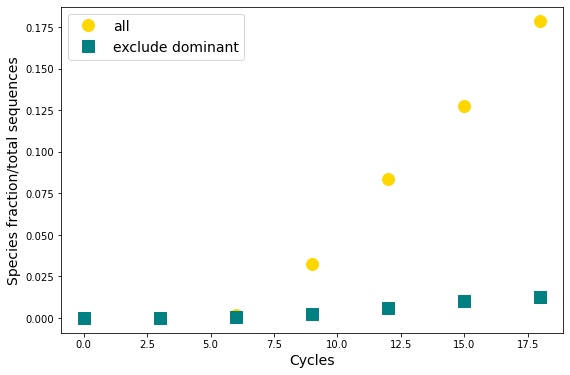

In [203]:
plt.figure(figsize=(9,6))
plt.plot(cycles_IDs,list1,marker='o',markersize=12,linestyle='none',color='gold',label='all')
plt.plot(cycles_IDs,list2,marker='s',markersize=12,linestyle='none',color='teal',label='exclude dominant')
#plt.plot(cycles_IDs,histo_norm,color='indigo')
plt.xlabel("Cycles",fontsize=14)
plt.ylabel("Species fraction/total sequences",fontsize=14)
plt.legend(fontsize=14)
plt.show()

## MCO and LTO in experimental data

**Pearson correlation MCO vs LTO & 2D histogram**

0.22044237388655422


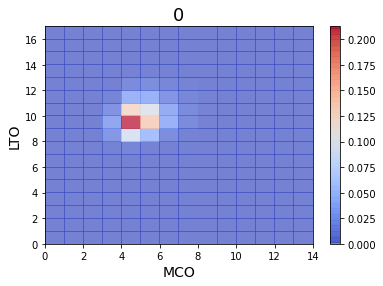

0.5059103084744896


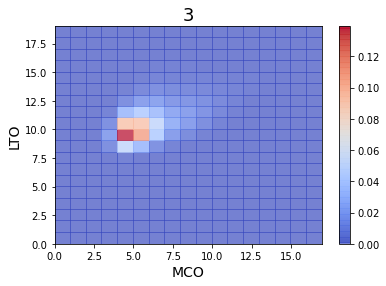

0.5307766210764913


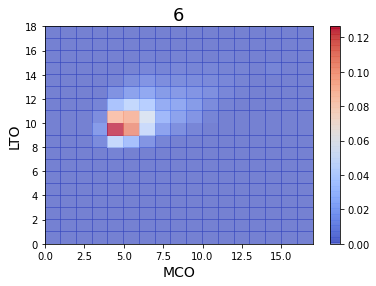

0.6558489034937233


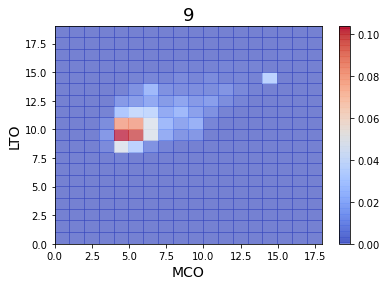

0.7397103083926551


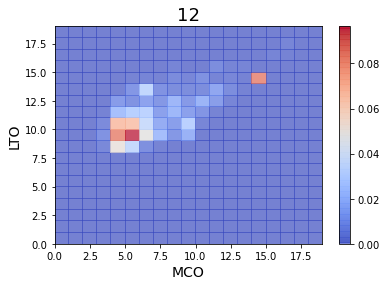

0.7522800155437781


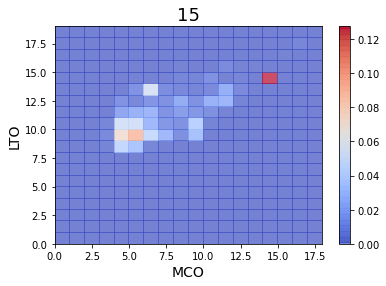

0.7787494675047288


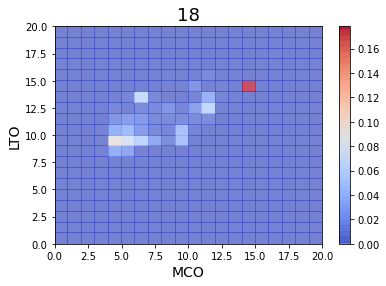

In [204]:
a=0
for c in cycles_IDs:
    curr_folder=folder+fastq_file_list_plot[a]
    MCO,LTO=np.loadtxt(curr_folder+"/all_MCO.txt",skiprows=1,usecols=(0,3),unpack=True)
    print(scipy.stats.pearsonr(MCO,LTO)[0])
    
    plt.hist2d(MCO,LTO,[np.arange(0,int(max(MCO)+1)),np.arange(0,int(max(LTO)+1))],cmap='coolwarm',alpha=0.7,density=True)
    plt.title(c,fontsize=18)
    plt.xlabel("MCO",fontsize=14)
    plt.ylabel("LTO",fontsize=14)
    plt.colorbar()
    plt.show()
    a+=1

**Histograms**

In [137]:
#dic_obs={'MCO':1,'MCO_2nd':2,'TMO':3,'LTO':4}
#dic_colors={'MCO':'limegreen','MCO_2nd':'gray','TMO':'dodgerblue','LTO':'red'}
dic_obs={'MCO':1,'LTO':4}
dic_colors={'MCO':'limegreen','LTO':'red'}
dic_widths={'MCO':0.9,'LTO':0.7}

def histogram_time():
    a=0

    for c in cycles_IDs:
        curr_folder=folder+fastq_file_list_plot[a]
        
        for obs in dic_obs:
            data_hist=np.zeros(21)
            data_array,copies=np.loadtxt(curr_folder+"/unique_all_sorted.txt",skiprows=1,
                                         usecols=(dic_obs[obs],5),unpack=True)

            tot_data=len(data_array)
            for i in range(0,tot_data,1):
                data_hist[int(data_array[i])]+=copies[i]
    
            plt.bar(np.arange(0,len(data_hist),1),data_hist,color=dic_colors[obs],label=obs,alpha=0.8,width=dic_widths[obs])
            
        plt.xlabel("Overlap",fontsize=14)
        plt.ylabel("Copies",fontsize=14)
        plt.legend(fontsize=14)
        plt.show()
    
        a+=1

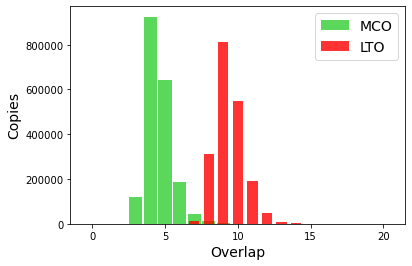

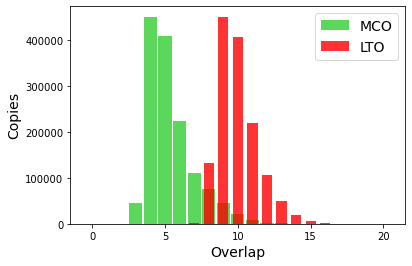

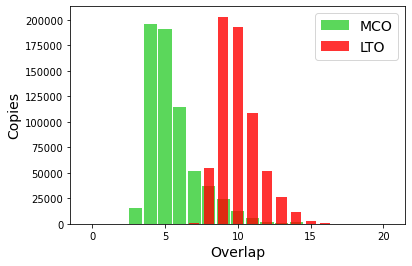

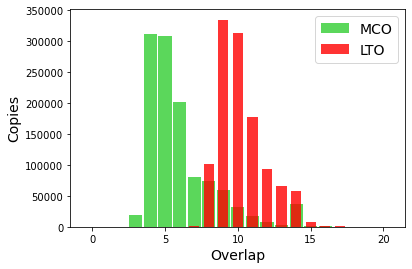

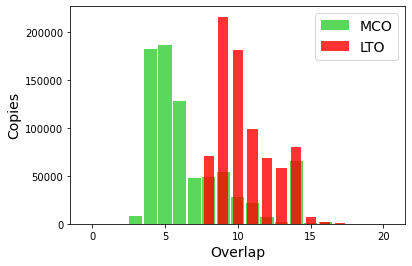

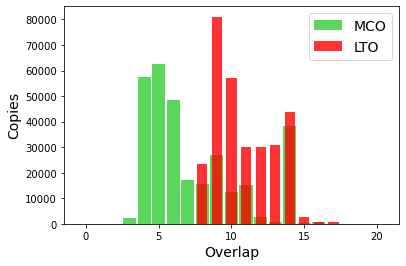

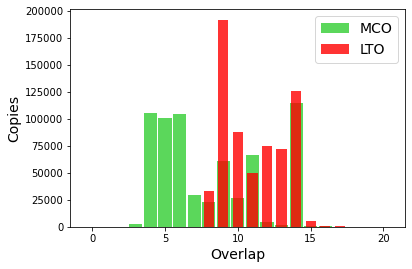

In [138]:
histogram_time()